In [1]:
# reload packages
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.datasets
import pandas as pd
import numpy as np
import umap
import networkx as nx

In [3]:
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from mpl_toolkits.mplot3d import Axes3D

In [5]:
#%matplotlib notebook

In [6]:
from tfumap.paths import FIGURE_DIR, ensure_dir, save_fig

### Draw network

In [18]:
from matplotlib import pyplot
from math import cos, sin, atan


class Neuron:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def draw(self, neuron_radius):
        circle = pyplot.Circle((self.x, self.y), radius=neuron_radius, fill=True, facecolor = '#EEEEEE', edgecolor='#333333', linewidth=5)
        pyplot.gca().add_patch(circle)


class Layer:
    def __init__(self, network, number_of_neurons, number_of_neurons_in_widest_layer):
        self.vertical_distance_between_layers = 2
        self.horizontal_distance_between_neurons = 2
        self.neuron_radius = 0.5
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.previous_layer = self.__get_previous_layer(network)
        self.y = self.__calculate_layer_y_position()
        self.neurons = self.__intialise_neurons(number_of_neurons)

    def __intialise_neurons(self, number_of_neurons):
        neurons = []
        x = self.__calculate_left_margin_so_layer_is_centered(number_of_neurons)
        for iteration in np.arange(number_of_neurons):
            neuron = Neuron(x, self.y)
            neurons.append(neuron)
            x += self.horizontal_distance_between_neurons
        return neurons

    def __calculate_left_margin_so_layer_is_centered(self, number_of_neurons):
        return (
            self.horizontal_distance_between_neurons
            * (self.number_of_neurons_in_widest_layer - number_of_neurons)
            / 2
        )

    def __calculate_layer_y_position(self):
        if self.previous_layer:
            return self.previous_layer.y + self.vertical_distance_between_layers
        else:
            return 0

    def __get_previous_layer(self, network):
        if len(network.layers) > 0:
            return network.layers[-1]
        else:
            return None

    def __line_between_two_neurons(self, neuron1, neuron2):
        angle = atan((neuron2.x - neuron1.x) / float(neuron2.y - neuron1.y))
        x_adjustment = self.neuron_radius * sin(angle)
        y_adjustment = self.neuron_radius * cos(angle)
        lw = .5 + (np.random.rand(1)-.5)/3
        lw = float(lw)
        line = pyplot.Line2D(
            (neuron1.x - x_adjustment, neuron2.x + x_adjustment),
            (neuron1.y - y_adjustment, neuron2.y + y_adjustment),
            linewidth = lw*10,
            alpha = lw,
            color="black",
            
        )
        pyplot.gca().add_line(line)

    def draw(self, layerType=0):
        for neuron in self.neurons:
            neuron.draw(self.neuron_radius)
            if self.previous_layer:
                for previous_layer_neuron in self.previous_layer.neurons:
                    self.__line_between_two_neurons(neuron, previous_layer_neuron)
        # write Text
        x_text = (
            self.number_of_neurons_in_widest_layer
            * self.horizontal_distance_between_neurons
        )


class NeuralNetwork:
    def __init__(self, number_of_neurons_in_widest_layer):
        self.number_of_neurons_in_widest_layer = number_of_neurons_in_widest_layer
        self.layers = []
        self.layertype = 0

    def add_layer(self, number_of_neurons):
        layer = Layer(self, number_of_neurons, self.number_of_neurons_in_widest_layer)
        self.layers.append(layer)

In [19]:
neural_network = [3,4,4, 2]
widest_layer = max( neural_network )
network = NeuralNetwork( widest_layer )
for l in neural_network:
    network.add_layer(l)

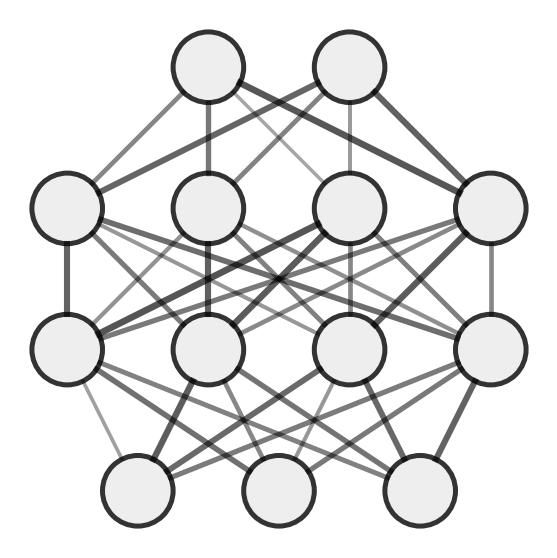

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
for layeri, layer in enumerate(network.layers):
    layer = network.layers[layeri]
    if layeri == len(network.layers)-1:
        layeri = -1
    layer.draw(layeri)
ax.axis('scaled')
ax.axis('off')


ensure_dir(FIGURE_DIR / 'UMAP_example')
plt.savefig(str(FIGURE_DIR / 'UMAP_example' / 'network_untrained') + ".svg", dpi=300, bbox_inches="tight", pad_inches=0)